In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 

In [4]:
# Calculate root mean squared error
def msee(actual, predicted):
    sum_error = 0.0
    for i in range(len(actual)):
        prediction_error = predicted[i] - actual[i]
        sum_error += (prediction_error ** 2)
        mean_error = sum_error / float(len(actual))
    return mean_error



def Train(X,Y):
    ''' With this function we are calculate the weights   '''
    X.astype(float)
    first=np.dot(X.T,X)
    first.astype(np.float16)
    inverse=np.linalg.inv(first)
    second=np.dot(X.T,Y)
    
    b=np.dot(inverse,second)
    return b


def add_bias(x):
    if (len(x.shape)==1):
        x=x[:,np.newaxis]
    b=np.ones((x.shape[0],1))
    nx=np.concatenate((b,x), axis=1)
    return nx

def prepare_y(x):
    if (len(x.shape)==1):
        x=x[:,np.newaxis]
    
    return x   

def predict(X,b):
    return (np.dot(X,b))


In [7]:
df=pd.read_csv('MpgData_with_Cateogeries.csv')
col=df.columns
we=df.to_numpy()
we=we[:,0:8]
we=we.astype(np.float64)
df.head()


,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,category,carname
0,15.0,8,350.0,165.0,3693.0,11.5,70,1,low,buick skylark 320
1,18.0,8,318.0,150.0,3436.0,11.0,70,1,Medium,plymouth satellite
2,16.0,8,304.0,150.0,3433.0,12.0,70,1,low,amc rebel sst
3,17.0,8,302.0,140.0,3449.0,10.5,70,1,low,ford torino
4,15.0,8,429.0,198.0,4341.0,10.0,70,1,low,ford galaxie 500


In [8]:
xtrain=we[:292,1:8]
ytrain=we[:292,0]
xtest=we[292:,1:8]
ytest=we[292:,0] 


In [48]:
for i in range(2,8):
    x_train=add_bias(xtrain[:,0:i])
    x_test=add_bias(xtest[:,0:i])
    
    
    b=Train(x_train,ytrain)
    
    train_predict=predict(x_train,b)
    train_error=msee(ytrain,train_predict)
    print('Training  Error for Multivariable regression using  {} variables is   {}  '.format(i,train_error))
    
    
    
    
    
   

Training  Error for Multivariable regression using  2 variables is   10.833581545129224  
Training  Error for Multivariable regression using  3 variables is   10.476388388884434  
Training  Error for Multivariable regression using  4 variables is   8.132889689912503  
Training  Error for Multivariable regression using  5 variables is   8.101001431734572  
Training  Error for Multivariable regression using  6 variables is   7.056627385554307  
Training  Error for Multivariable regression using  7 variables is   6.782307383282693  


In [49]:
for i in range(2,8):
    x_train=add_bias(xtrain[:,0:i])
    x_test=add_bias(xtest[:,0:i])
    b=Train(x_train,ytrain)
    test_predict=predict(x_test,b)
    test_error=msee(ytest,test_predict)
    print('Testing Error for Multivariable regression using  {} variables is   {}  '.format(i,test_error))
    
    
    

Testing Error for Multivariable regression using  2 variables is   [68.9594616]  
Testing Error for Multivariable regression using  3 variables is   [66.32165299]  
Testing Error for Multivariable regression using  4 variables is   [64.0109777]  
Testing Error for Multivariable regression using  5 variables is   [64.08819848]  
Testing Error for Multivariable regression using  6 variables is   [38.32210931]  
Testing Error for Multivariable regression using  7 variables is   [36.03864958]  


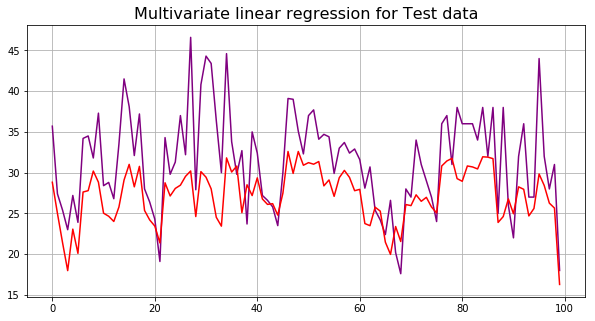

In [77]:


x_train=add_bias(xtrain)
x_test=add_bias(xtest)
b=Train(x_train,ytrain)
test_predict=predict(x_test,b)
plt.figure(figsize=(10,5))
plt.title('Multivariate linear regression for Test data',fontsize=16)
plt.grid(True)
plt.plot(ytest , color='purple')
plt.plot(test_predict , color='red'  )
plt.show()